# 3 - Cluster Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
color_dict = {'red': 0, 'blue': 1, 'green': 2, 'teal': 3, 'orange': 4, 'purple': 5}
train_df['color'] = train_df.color.apply(lambda x: color_dict[x])
np.random.shuffle(train_df.values)

print(train_df.head())
print(train_df.color.unique())

          x         y  color
0  0.129270  1.979720      0
1 -0.380831  1.693519      0
2  0.718693  1.791793      0
3  0.722922  0.620655      0
4 -0.432689  0.541550      0
[0 1 2 3 4 5]


# Plotting Data

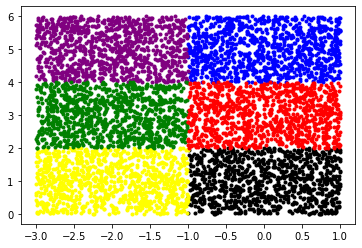

In [3]:
df0 = train_df[train_df.color==0]
df1 = train_df[train_df.color==1]
df2 = train_df[train_df.color==2]
df3 = train_df[train_df.color==3]
df4 = train_df[train_df.color==4]
df5 = train_df[train_df.color==5]

plt.scatter(df0.x, df0.y, marker = '.', color='black')
plt.scatter(df1.x, df1.y, marker = '.', color='blue')
plt.scatter(df2.x, df2.y, marker = '.', color='yellow')
plt.scatter(df3.x, df3.y, marker = '.', color='purple')
plt.scatter(df4.x, df4.y, marker = '.', color='green')
plt.scatter(df5.x, df5.y, marker = '.', color='red')

plt.show()

# Sequencial API

In [4]:
# model = keras.Sequential([
# keras.layers.Dense(32, input_shape=(2,), activation='relu'),
# keras.layers.Dense(32, activation='relu'),
# keras.layers.Dense(6, activation='sigmoid')])

# Functional API

In [5]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(32, activation='relu', name='First_layer')(inputs)
x = keras.layers.Dense(32, activation='relu', name='Second_layer')(x)
outputs = keras.layers.Dense(6, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 32)                96        
_________________________________________________________________
Second_layer (Dense)         (None, 32)                1056      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 1,350
Trainable params: 1,350
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [6]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
x = np.column_stack((train_df.x.values, train_df.y.values))
y = train_df.color.values

In [16]:
clf = model.fit(x, y, batch_size=4, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0721 - accuracy: 0.9738
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0709 - accuracy: 0.9758
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0690 - accuracy: 0.9767
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0685 - accuracy: 0.9788
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0669 - accuracy: 0.9802
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0663 - accuracy: 0.9778
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0649 - accuracy: 0.9790: 0s - loss: 1
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0650 - accuracy: 0.9790
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0644 - accuracy: 0.9790
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step

# Test Data Evaluation

In [17]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

print("EVALUATION")
test_df['color'] = test_df.color.apply(lambda x: color_dict[x])
model.evaluate(test_x, test_df.color.values)

print("Prediction", np.round(model.predict(np.array([[-2,3]]))))

EVALUATION
38/38 [==============================] - 0s 1ms/step - loss: 1.0674 - accuracy: 0.9683
Prediction [[0. 0. 0. 0. 1. 0.]]


# Plotting Testing Data

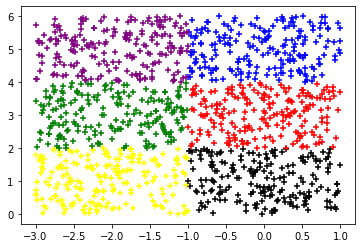

In [10]:
df0 = test_df[test_df.color==0]
df1 = test_df[test_df.color==1]
df2 = test_df[test_df.color==2]
df3 = test_df[test_df.color==3]
df4 = test_df[test_df.color==4]
df5 = test_df[test_df.color==5]

plt.scatter(df0.x, df0.y, marker = '+', color='black')
plt.scatter(df1.x, df1.y, marker = '+', color='blue')
plt.scatter(df2.x, df2.y, marker = '+', color='yellow')
plt.scatter(df3.x, df3.y, marker = '+', color='purple')
plt.scatter(df4.x, df4.y, marker = '+', color='green')
plt.scatter(df5.x, df5.y, marker = '+', color='red')

plt.show()

# Plotting Hyperplane ( Training Data )

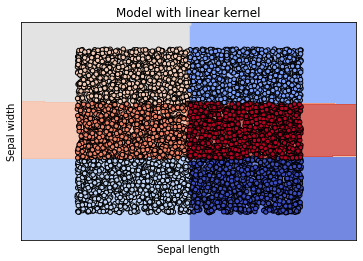

In [18]:
def make_meshgrid(x, y, h=0.02):
 
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# # Set-up 2x2 grid for plotting.
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Model with linear kernel")

plt.show()

# Plotting Hyperplane ( Test Data )

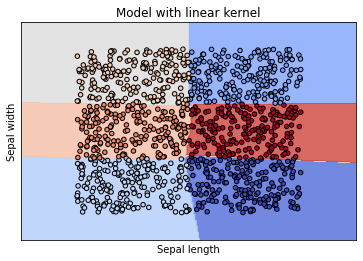

In [19]:
y = test_df.color.values
x = test_x

# # Set-up 2x2 grid for plotting.
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Model with linear kernel")

plt.show()